## Project 4


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#### Read image and convert pixels to a numpy array

In [2]:
# opens image and converts to rgb array
def read_image_rgb(image_path):
    # open image
    img = Image.open(image_path)
    img = img.convert('RGB')
    
    # convert image to numpy array
    pixel_data = np.array(img)
    pixels = pixel_data.reshape(-1, 3)
    
    return pixels, pixel_data

#### K-means algorithm for getting k colors from image

In [3]:
# euclidean distance formula
def dist(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# assigns points to closest centroid
def assign_clusters(data, centroids):
    clusters = [[] for _ in centroids]
    
    for p in data:
        # get distance from point to all centroids
        distances = [dist(p, centroid) for centroid in centroids]
        
        # get index of closest centroid
        closest = np.argmin(distances)
        clusters[closest].append(p)
    return clusters
        
# recompute centroids
def recompute_means(clusters):
    new_centroids = []
    for cluster in clusters:
        if cluster: 
            new_centroids.append(np.mean(cluster, axis=0))
        else:
            # if cluster is empty, reinitialize with a random point
            new_centroids.append(np.random.randint(0, 255, 3))

    return new_centroids
        
# k means algorithm
def k_means(data, initial_centroids):
    # initialize centroids with random pixels
    initialize = np.random.choice(len(data), initial_centroids)
    centroids = data[initialize]
    
    # max iterations of 10
    for _ in range(10):
        # assign clusters
        clusters = assign_clusters(data, centroids)
        
        # recompute means
        new_centroids = recompute_means(clusters)
        
        # check if there are changes in centroids
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids

#### Recolor image based using centroids

In [4]:
# recolor image
def recolor(data, centroids):
    recolored_data = np.zeros_like(data)
    
    for i, p in enumerate(data):
        # get distance from point to all centroids
        distances = [dist(p, centroid) for centroid in centroids]
        
        # get index of closest centroid
        closest = np.argmin(distances)
        
        # assign the color of the closest centroid
        recolored_data[i] = centroids[closest]
    
    return recolored_data

#### Display all images

In [5]:
# run k means algorithm and display images
def print_image(image_path):
    # get rgb array
    pixels, original_img = read_image_rgb(image_path)
    
    # figure for plotting
    fig = plt.figure(figsize=(15, 10))
    
    # display original image
    fig.add_subplot(3, 3, 1)
    plt.title('Original')
    plt.imshow(original_img)
    plt.axis('off')
    
    # run k means for k from 3 to 10
    for k in range(3, 11):
        # k means algorithm
        centroids = k_means(pixels, k)
        recolored_pixels = recolor(pixels, centroids)
        
        # reshape to original dimentions
        recolored_img = recolored_pixels.reshape(original_img.shape)
        
        # display recolored image
        fig.add_subplot(3, 3, k-1)
        plt.title(f'K = {k}')
        plt.imshow(recolored_img)
        plt.axis('off')
    
    plt.show()

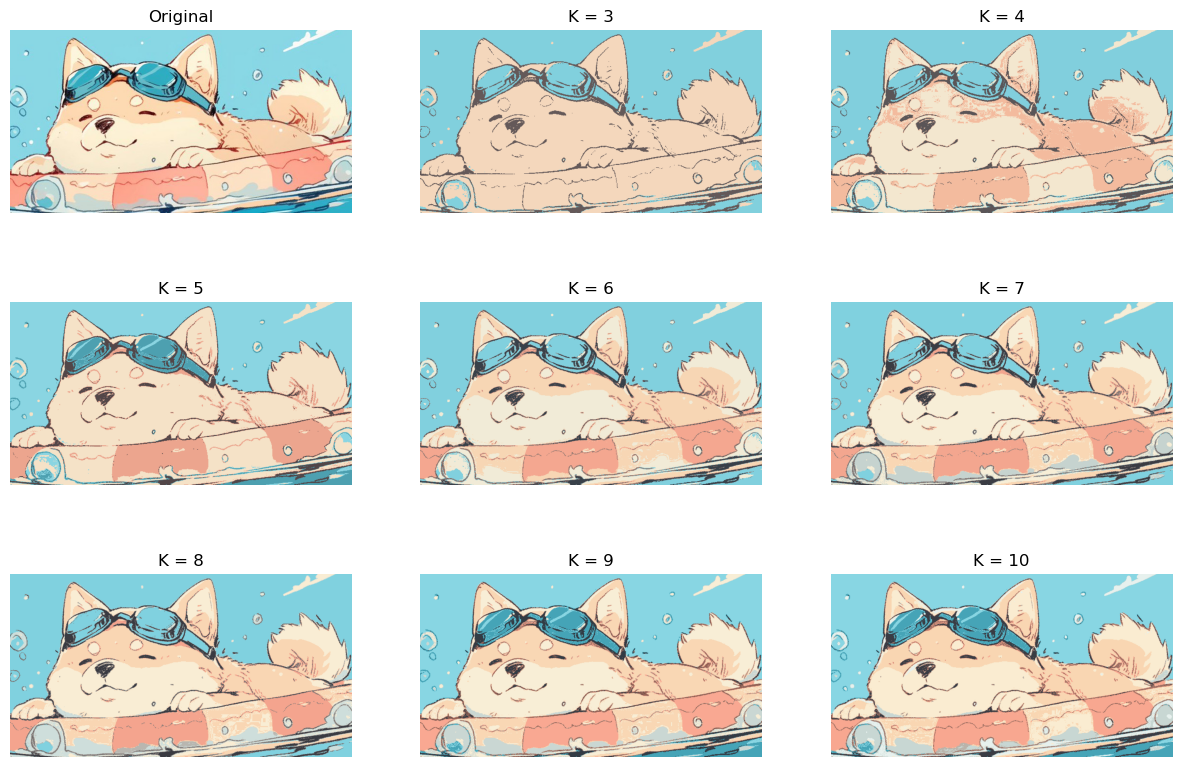

In [6]:
print_image('image1.jpg')

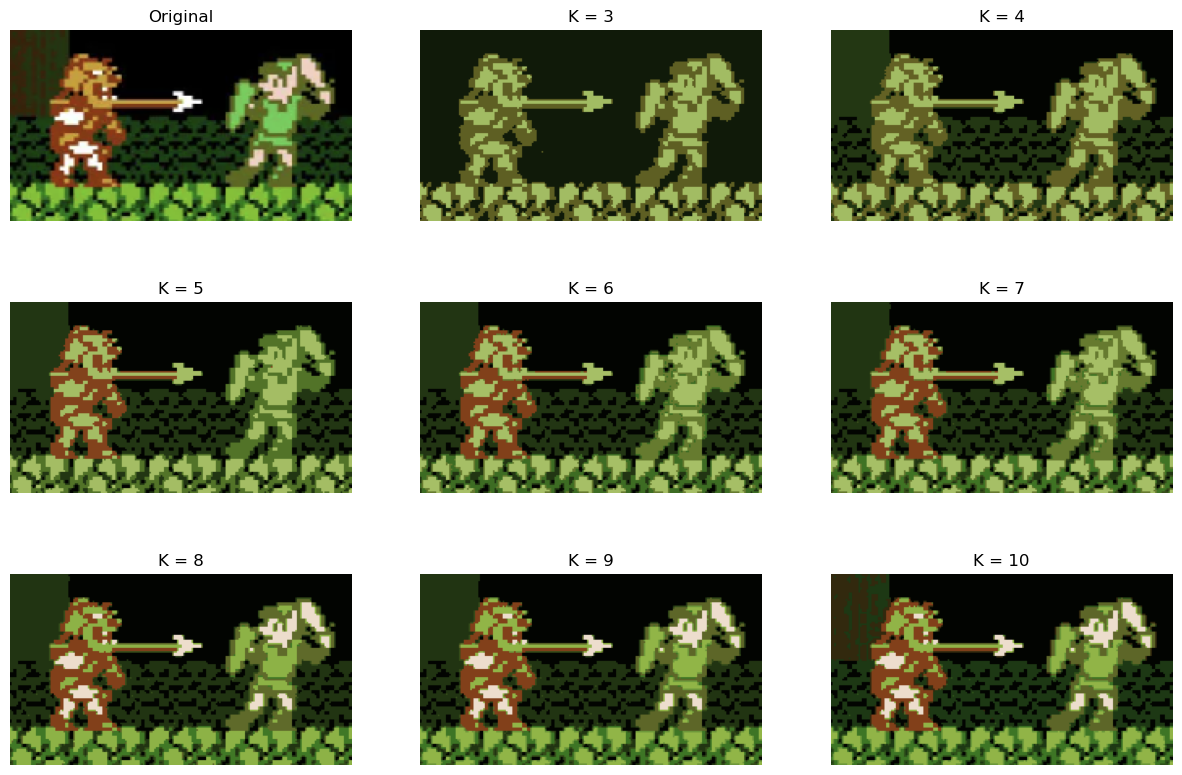

In [7]:
print_image('image2.jpg')

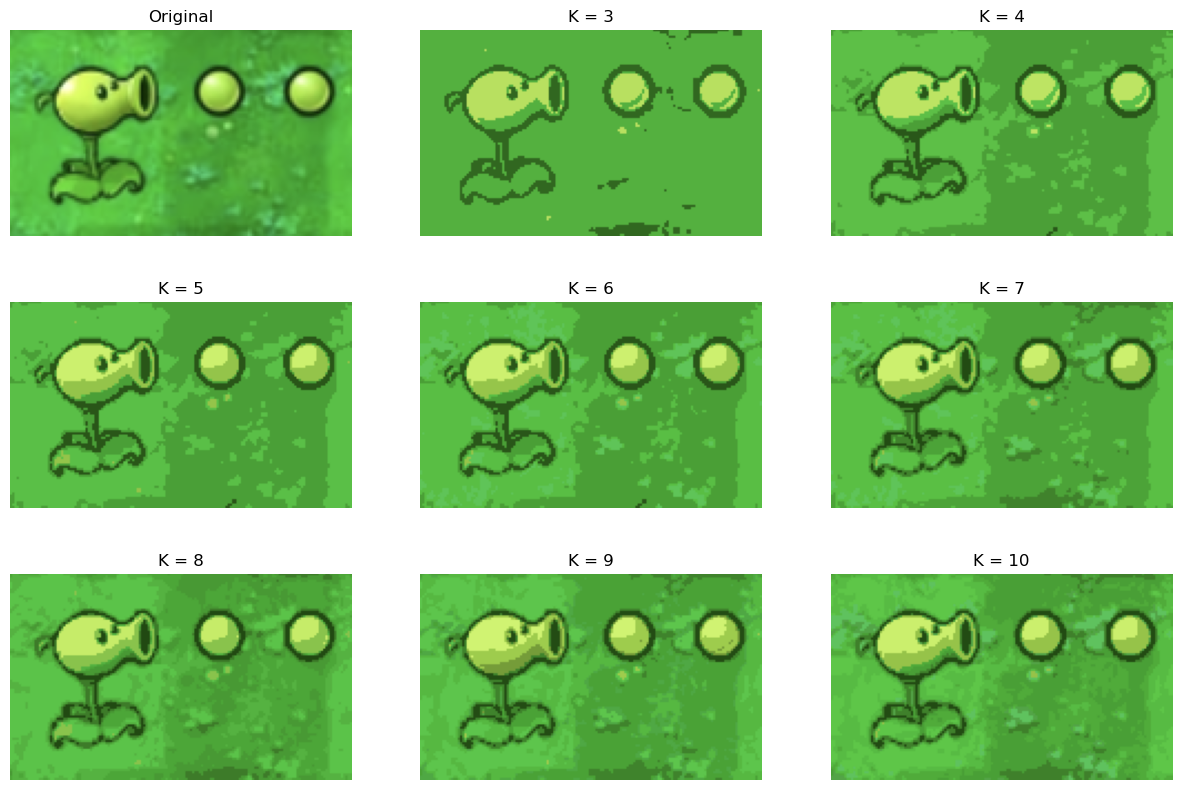

In [8]:
print_image('image3.jpg')